## In this notebook, I compare the accuracies of a regular neural network and a convolutional neural network on 2 datasets, CIFAR10 and MNIST. The tensorflow docs have been used as a reference.

Suketu Patni, 23B1299, MRT Software

The following parameters will be same for all cases:-


*   Training : Testing Split (4:1)
*   Dense Layers (Flatten, 64 activated by RELU, 10)
*   Optimizer (Adam)
*   Loss Function (SparseCategoricalCrossEntropy)
*   Metric (Accuracy)
*   Training Epochs (10)

# ***Imports***

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ***Helper Functions***

## Load data and preprocess it

In [ ]:
def load_data(dataset_name):
    dataset = 0

    if dataset_name == "mnist":
        dataset = tf.keras.datasets.mnist
    elif dataset_name == "cifar10":
        dataset = tf.keras.datasets.cifar10

    (train_images, train_labels), (test_images, test_labels) = dataset.load_data()

    # .load_data() has a 6:1 split for mnist and 5:1 for cifar10
    # But we want a 4:1 split.

    all_images = np.concatenate((train_images, test_images))
    all_labels = np.concatenate((train_labels, test_labels))

    train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, train_size = 0.8)

    train_images = train_images/255.0 # the contracted "/=" operator doesn't work
    test_images = test_images/255.0 # this is done only for mathematical convenience, nothing else

    return train_images, test_images, train_labels, test_labels

## See the first 25 images of dataset with their labels

In [ ]:
def view_some_images(training_images, training_labels, dataset_name):

    plt.figure(figsize=(10,10))

    for i in range(25):

        plt.subplot(5,5,i+1) # to display lots of images in 1 plot
        plt.xticks([]) # disable the x and y axes
        plt.yticks([])
        plt.grid(False)

        if dataset_name == "mnist":
            plt.imshow(training_images[i], cmap=plt.cm.binary) # greyscale
            plt.xlabel(training_labels[i])

        elif dataset_name == "cifar10":
            class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                           'dog', 'frog', 'horse', 'ship', 'truck']
            plt.imshow(training_images[i])
            plt.xlabel(class_names[training_labels[i][0]])

    plt.show()

## Set parameters for model

In [ ]:
# 3 parameters must be chosen to make model complete: optimizer, loss function, and metric
# no clue what optimizer is, loss function is the objective function that must be minimized,
# metric is just used to compare guesses

def set_params(model):
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

------------------------------------
# ***1. MNIST***
------------------------------------

### There are 56,000 images in the training data and 14,000 images in the testing data. Each image is of size 28x28. Each label is a digit from 0 to 9.

In [ ]:
train_images_m, test_images_m, train_labels_m, test_labels_m = load_data("mnist")

In [ ]:
train_images_m.shape, train_labels_m, test_images_m.shape, test_labels_m

((56000, 28, 28),
 array([7, 1, 5, ..., 2, 9, 6], dtype=uint8),
 (14000, 28, 28),
 array([9, 1, 7, ..., 9, 7, 7], dtype=uint8))

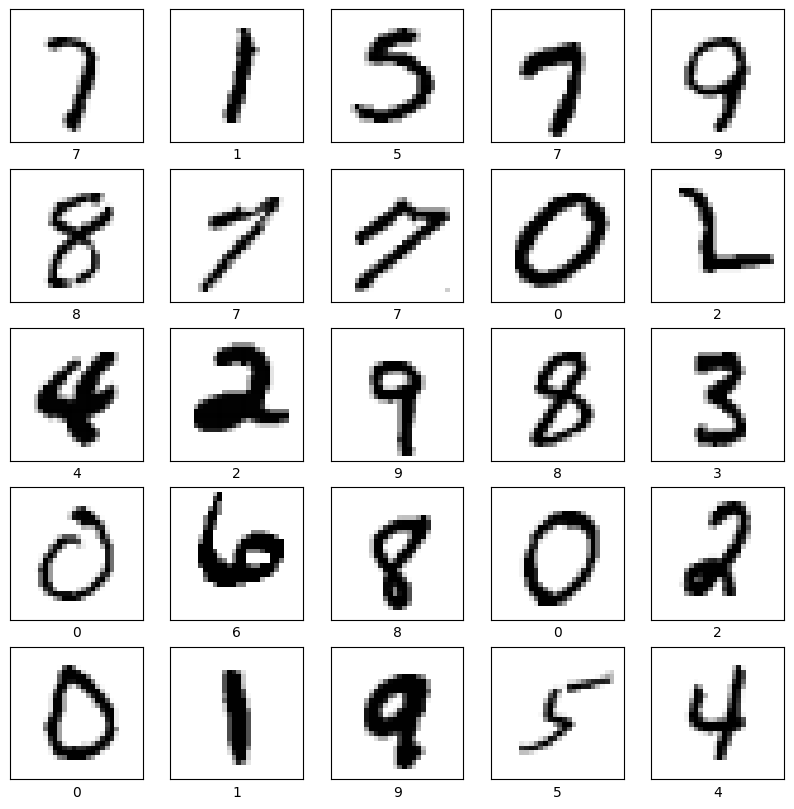

In [ ]:
view_some_images(train_images_m, train_labels_m, "mnist")

## 1.1. Regular Neural Network Model

In [ ]:
model_mnist_nn = tf.keras.Sequential([ # sequence of layers
    tf.keras.layers.Flatten(input_shape=(28, 28)), # first layer is just all the pixels of an image, but flattened to 1d array
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10) # gives logit
])

In [ ]:
set_params(model_mnist_nn)

In [ ]:
model_mnist_nn.fit(train_images_m, train_labels_m, epochs=10)

Epoch 1/10
1750/1750 [==============================] - 19s 10ms/step - loss: 0.3107 - accuracy: 0.9123
Epoch 2/10
1750/1750 [==============================] - 13s 8ms/step - loss: 0.1496 - accuracy: 0.9556
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9674
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0861 - accuracy: 0.9743
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0707 - accuracy: 0.9790
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9818
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 8/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 9/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 10/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.

In [ ]:
test_loss_m_nn, test_acc_m_nn = model_mnist_nn.evaluate(test_images_m,  test_labels_m, verbose=2)
print('Test accuracy:', test_acc_m_nn)

438/438 - 1s - loss: 0.0990 - accuracy: 0.9716 - 901ms/epoch - 2ms/step
Test accuracy: 0.9715714454650879


### ***Comments***
1. If test set accuracy is less than train set accuracy, our model has been overfit.
2. `probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])` \\
Softmax maps each neuron output to a probability between 0 and 1 by taking the proportion of its exponential in the sum of all such exponentials

    Before Softmax: \\
    `array([ -5.806527 , -10.368317 ,  -2.640046 ,   0.3296631, -18.294333 ,
    -5.0507913, -15.660252 ,  10.848922 ,  -6.6889   ,  -4.209168 ]` \\
    These values are called logits

    After Softmax: \\
    `array([5.8427574e-08, 6.1017924e-10, 1.3861272e-06, 2.7010430e-05,
    2.2041102e-13, 1.2440263e-07, 3.0704304e-12, 9.9997097e-01,
    2.4177298e-08, 2.8863030e-07], dtype=float32)` \\

    Basically Softmax(logits) = probabilities

3. For getting an array of all predictions, use `predictions = probability_model.predict(test_images)`

In [ ]:
model_mnist_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 1.2. Convolutional Neural Network

In [ ]:
model_mnist_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

In [ ]:
set_params(model_mnist_cnn)

In [ ]:
model_mnist_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
model_mnist_cnn.fit(train_images_m, train_labels_m, epochs=10)

Epoch 1/10
1750/1750 [==============================] - 53s 30ms/step - loss: 0.1466 - accuracy: 0.9541
Epoch 2/10
1750/1750 [==============================] - 48s 27ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 3/10
1750/1750 [==============================] - 48s 28ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 4/10
1750/1750 [==============================] - 47s 27ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 5/10
1750/1750 [==============================] - 46s 26ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 6/10
1750/1750 [==============================] - 47s 27ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 7/10
1750/1750 [==============================] - 54s 31ms/step - loss: 0.0127 - accuracy: 0.9959
Epoch 8/10
1750/1750 [==============================] - 46s 26ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 9/10
1750/1750 [==============================] - 45s 26ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 10/10
1750/1750 [==============================] - 47s 27m

In [ ]:
test_loss_m_cnn, test_acc_m_cnn = model_mnist_cnn.evaluate(test_images_m,  test_labels_m, verbose=2)
print('Test accuracy:', test_acc_m_cnn)

438/438 - 4s - loss: 0.0418 - accuracy: 0.9903 - 4s/epoch - 9ms/step
Test accuracy: 0.9902856945991516


It is observed that the CNN takes a lot more time per epoch. But it achieves far greater accuracy in training images.

## 2. CIFAR10

### There are 48,000 images in the training data and 12,000 images in the testing data. Each image is of size 32x32. Each label is an object ('airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck').


In [ ]:
train_images_c, test_images_c, train_labels_c, test_labels_c = load_data("cifar10")

In [ ]:
train_images_c.shape, train_labels_c, test_images_c.shape, test_labels_c

((48000, 32, 32, 3),
 array([[0],
        [4],
        [6],
        ...,
        [1],
        [8],
        [2]], dtype=uint8),
 (12000, 32, 32, 3),
 array([[3],
        [2],
        [1],
        ...,
        [4],
        [1],
        [9]], dtype=uint8))

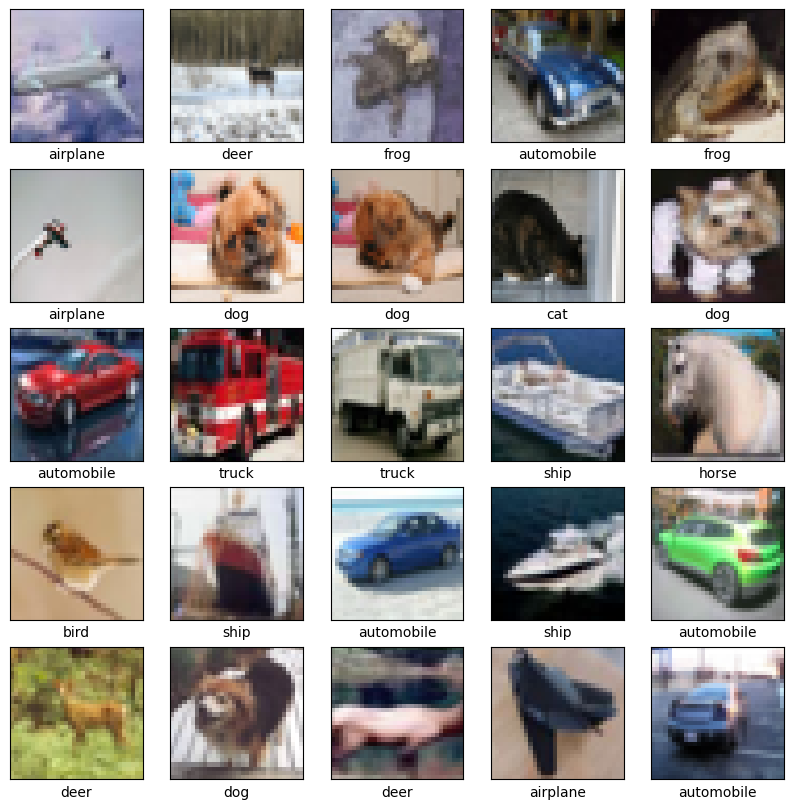

In [ ]:
view_some_images(train_images_c, train_labels_c, "cifar10")

## 1.1. Regular Neural Network Model

In [ ]:
model_cifar10_nn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
set_params(model_cifar10_nn)

In [ ]:
model_cifar10_nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                196672    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 197322 (770.79 KB)
Trainable params: 197322 (770.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_cifar10_nn.fit(train_images_c, train_labels_c, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 1.9210 - accuracy: 0.3049
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.7878 - accuracy: 0.3610
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 1.7330 - accuracy: 0.3805
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.6916 - accuracy: 0.3966
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6651 - accuracy: 0.4043
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.6494 - accuracy: 0.4104
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6392 - accuracy: 0.4135
Epoch 8/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6325 - accuracy: 0.4166
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6182 - accuracy: 0.4209
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6

In [ ]:
test_loss_c_nn, test_acc_c_nn = model_cifar10_nn.evaluate(test_images_c,  test_labels_c, verbose=2)
print('Test accuracy:', test_acc_c_nn)

375/375 - 1s - loss: 1.7071 - accuracy: 0.3917 - 827ms/epoch - 2ms/step
Test accuracy: 0.3916666805744171


### ***Comments***
1. There is no accuracy at all. This shows the major advantage of CNNs over regular neural networks: that they pick up features locally, not globally. CNNs can pickup features anywhere in the image, but the latter confine them to an area in the image where they may not necessarily be.

## 2.2. Convolutional Neural Network

In [ ]:
model_cifar10_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

In [ ]:
set_params(model_cifar10_cnn)

In [ ]:
model_cifar10_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [ ]:
model_cifar10_cnn.fit(train_images_c, train_labels_c, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 60s 39ms/step - loss: 1.5165 - accuracy: 0.4445
Epoch 2/10
1500/1500 [==============================] - 57s 38ms/step - loss: 1.1569 - accuracy: 0.5894
Epoch 3/10
1500/1500 [==============================] - 56s 38ms/step - loss: 1.0063 - accuracy: 0.6438
Epoch 4/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.9120 - accuracy: 0.6815
Epoch 5/10
1500/1500 [==============================] - 59s 40ms/step - loss: 0.8393 - accuracy: 0.7074
Epoch 6/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.7868 - accuracy: 0.7236
Epoch 7/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.7317 - accuracy: 0.7445
Epoch 8/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.6984 - accuracy: 0.7546
Epoch 9/10
1500/1500 [==============================] - 58s 38ms/step - loss: 0.6563 - accuracy: 0.7708
Epoch 10/10
1500/1500 [==============================] - 59s 40m

In [ ]:
test_loss_c_cnn, test_acc_c_cnn = model_cifar10_cnn.evaluate(test_images_c,  test_labels_c, verbose=2)
print('Test accuracy:', test_acc_c_cnn)

375/375 - 4s - loss: 0.8575 - accuracy: 0.7113 - 4s/epoch - 11ms/step
Test accuracy: 0.7113333344459534


## ***Comments***

1. It is in complicated image datasets like the CIFAR10 that CNNs really shine. Where vanilla neural networks achieve only 40% accuracy, they achieve close to 70% on the test sets.